### Ans_I

In [2]:
#importing useful modules
import matplotlib.pyplot as plt
import pickle

In [5]:
#storing vowels, dependent vowels and punctuations in lists to build some initial base.
dep_vowels = ["ा", "ि", "ी", "ु", "ू", "े", "ो", "ै", "ौ", "ृ", "ॄ", "ॉ", "ं", '्']
vowels = ["अ", "आ", "इ", "ई", "उ", "ऊ", "ऋ", "ॠ", "ए", "ऐ", "ओ", "औ", "अं", "अः"]
punctuations=['”',"।","|",";",",",":","!",'"',"?",":-","-","{","(","}",")","_","०","S","―","=","[","]","......",":-",".","॥",""]

In [6]:
#this cell helps to split 22GB file into 1GB of chunks.
#splitting the data
# file = open('dataset\\hi_language_corpora_Ques3\\data\\hi\\hi.txt', encoding = 'utf8', errors = 'replace')
# count = 1
# filename = 1
# savefile = open('splitdataQ3\\'+str(filename)+'.txt', 'w+')
# while True:
#     line = file.readline()
#     if not line:
#         break
#     savefile.write(line)
#     if count == 3500000:
#         filename+=1
#         savefile = open('splitdataQ3\\'+str(filename)+'.txt', 'w+')
#         count = 1
#     count+=1

In [7]:
#pun_remove function helps in removing puntuations from hindi lines.
def pun_remove(line):
    rline = ''
    for char in line:
        if char not in punctuations:
            rline += char
    return rline

#process function returns lists of characters since it is needed further to calculate the results
def process(line):
    linelist, linewords = [], []
    line1 = pun_remove(line)
    s_line = line1.split()
    for word in s_line:
        wordlist = []
        linewords.append(word)
        for char in word:
            if ord(char) in range(2304, 2431) and char not in punctuations:
                wordlist.append(char)
        if len(wordlist) == 0:
            continue
        else:
            linelist.append(wordlist)
    return linelist, linewords

#replace_a function inserts 'अ' where it is needed.
def replace_a(linelist):
    c_list = linelist
    for word in linelist:
        for i in range(len(word)-1):
            if word[i] in vowels or word[i] in dep_vowels or word[i+1] in dep_vowels or word[i+1] in dep_vowels:
                continue
            elif word[i] not in vowels and word[i+1] not in vowels:
                word.insert(i+1, 'अ')
        if word[len(word)-1] not in vowels and word[len(word)-1] not in dep_vowels:
            word.append('अ')
    return c_list

In [8]:
#chargrams function helps in counting and append all the characters in a final dictionary
#n = 1 for unichar, n = 2 for bichar, n = 3 for trichar and n = 4 for quadrichar
def chargrams(n, dictie, listie):
    if len(listie) >= n:
        for i in range(len(listie)-(n-1)):
            if n != 1:
                tup = ()
                for k in range(n):
                    tup += (listie[i+k],)
            else:
                tup = listie[i]
            if tup not in dictie.keys():
                dictie[tup] = 1
            else:
                dictie[tup] += 1

#wordgrams function helps in counting and append all the words in a final dictionary
#n = 1 for uniword, n = 2 for biword, n = 3 for triword
def wordgrams(n, dictie, listie):
    if len(listie) >= n:
        for i in range(len(listie)-(n-1)):
            if n != 1:
                tup = ()
                for k in range(n):
                    tup += (listie[i+k],)
            else:
                tup = listie[i]
            if tup not in dictie.keys():
                dictie[tup] = 1
            else:
                dictie[tup] += 1

In [9]:
#sylcreate function takes input a list of characters and returns list of syllables.
def sylcreate(listie):
    olist = []
    istr = ''
    i = 0
    while i < len(listie)-1:
        if (listie[i] in vowels or listie[i] in dep_vowels) and (listie[i+1] not in vowels and listie[i+1] not in dep_vowels) and listie[i] != '्':
            if listie[i] == 'अ':
                if i != 0:
                    olist.append(istr)
                else:
                    istr+=listie[i]
                    olist.append(istr)
            else:
                istr += listie[i]
                olist.append(istr)
            istr = ''
        elif i == len(listie)-2:
            if listie[i+1] == 'अ':
                istr+=listie[i]
            else:
                istr += listie[i]
                istr += listie[i+1]
            olist.append(istr)
        elif (listie[i] not in vowels and listie[i] not in dep_vowels) and listie[i+1] ==  '्':
            istr+= listie[i]
        elif listie[i] == '्' and (listie[i+1] not in vowels and listie[i+1] not in dep_vowels):
            istr += listie[i]
        elif (listie[i] in vowels or listie[i] in dep_vowels) and (listie[i+1] in vowels or listie[i+1] in dep_vowels):
            istr += listie[i]
        elif (listie[i] not in vowels and listie[i] not in dep_vowels) and (listie[i+1] in vowels or listie[i+1] in dep_vowels):
            istr += listie[i]
        i += 1
    return olist
        


In [10]:
#merge functions merges two dictionaries(as we divided 22GB file into some chunks)
def merge(tdictie, dictie):
    for key, value in tdictie.items():
        if key not in dictie.keys():
            dictie[key] = value
        else:
            dictie[key]+= value
    

In [11]:
#tophundred function stores top thousand key, value pairs in a dictionary.
def tophundred(dictie):
    if len(dictie) > 1000:
        tdictie = dict(sorted(dictie.items(), key = lambda x:x[1], reverse=True)[:1000])
        return tdictie
    else:
        return dict(sorted(dictie.items(), key= lambda x:x[1], reverse=True))

In [12]:
#main files to store data
uni_dict, bi_dict, tri_dict, quadri_dict = {}, {}, {}, {}
uni_word, bi_word, tri_word = {}, {}, {}
uni_syl, bi_syl, tri_syl = {}, {}, {}
name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
c = 0

In [2]:

#main function which process all data and call all functions defined above
for filename in name:
    file = open('splitdataQ3\\'+str(filename)+'.txt', encoding = 'utf8', errors = 'replace')
    tuni_dict, tbi_dict, ttri_dict, tquadri_dict = {}, {}, {}, {}
    tuni_word, tbi_word, ttri_word = {}, {}, {}
    tuni_syl, tbi_syl, ttri_syl = {}, {}, {}
    while True:
        line = file.readline()
        if not line:
            break
        c+=1
        charlist, wordlist = process(line)
        linelist = replace_a(charlist)
        for inlist in linelist:
            chargrams(1, tuni_dict, inlist)
            chargrams(2, tbi_dict, inlist)
            chargrams(3, ttri_dict, inlist)
            chargrams(4, tquadri_dict, inlist)
            syl = sylcreate(inlist)
            wordgrams(1, tuni_syl, syl)
            wordgrams(2, tbi_syl, syl)
            wordgrams(3, ttri_syl, syl)
        wordgrams(1, tuni_word, wordlist)
        wordgrams(2, tbi_word, wordlist)
        wordgrams(3, ttri_word, wordlist)

    tuni_dict = tophundred(tuni_dict)
    tbi_dict = tophundred(tbi_dict)
    ttri_dict = tophundred(ttri_dict)
    tquadri_dict = tophundred(tquadri_dict)
    tuni_word = tophundred(tuni_word)
    tbi_word = tophundred(tbi_word)
    ttri_word = tophundred(ttri_word)
    tuni_syl = tophundred(tuni_syl)
    tbi_syl = tophundred(tbi_syl)
    ttri_syl = tophundred(ttri_syl)

    merge(tuni_dict, uni_dict)
    merge(tbi_dict, bi_dict)
    merge(ttri_dict, tri_dict)
    merge(tquadri_dict, quadri_dict)
    merge(tuni_word, uni_word)
    merge(tbi_word, bi_word)
    merge(ttri_word, tri_word)
    merge(tuni_syl, uni_syl)
    merge(tbi_syl, bi_syl)
    merge(ttri_syl, tri_syl)

In [4]:
#To save the results
# with open('uni_char.pickle', 'wb') as f:
#     pickle.dump(uni_dict, f)
# with open('bi_char.pickle', 'wb') as f:
#     pickle.dump(bi_dict, f)
# with open('tri_char.pickle', 'wb') as f:
#     pickle.dump(tri_dict, f)
# with open('quadri_char.pickle', 'wb') as f:
#     pickle.dump(quadri_dict, f)
# with open('uni_word.pickle', 'wb') as f:
#     pickle.dump(uni_word, f)
# with open('bi_word.pickle', 'wb') as f:
#     pickle.dump(bi_word, f)
# with open('tri_word.pickle', 'wb') as f:
#     pickle.dump(tri_word, f)
# with open('uni_syl.pickle', 'wb') as f:
#     pickle.dump(uni_syl, f)
# with open('bi_syl.pickle', 'wb') as f:
#     pickle.dump(bi_syl, f)
# with open('tri_syl.pickle', 'wb') as f:
#     pickle.dump(tri_syl, f)

In [4]:
import pickle
#To load the results from pickle file
with open('Answer_3_output\\2cr\\uni_syl.pickle', 'rb') as f:
    dataa = pickle.load(f)
dataa

{'र': 55687606,
 'क': 32231776,
 'न': 27619572,
 'स': 27544493,
 'के': 23165836,
 'प': 22149062,
 'ने': 18950539,
 'ल': 17931293,
 'त': 17273343,
 'का': 16844032,
 'म': 15306596,
 'ह': 15211611,
 'में': 15133533,
 'की': 13704129,
 'ब': 13529967,
 'अ': 13320271,
 'है': 12632403,
 'या': 12376074,
 'से': 12366542,
 'ज': 11621677,
 'कि': 10965318,
 'ग': 10570034,
 'व': 10556770,
 'को': 10314835,
 'य': 10229066,
 'द': 9457482,
 'ना': 9143489,
 'रा': 9085074,
 'आ': 8875191,
 'उ': 8753305,
 'ता': 8359767,
 'इ': 7824350,
 'वा': 7707948,
 'ले': 7042179,
 'औ': 6849785,
 'मा': 6860074,
 'सा': 6600539,
 'ला': 6547127,
 'री': 6337177,
 'हा': 6158977,
 'श': 6097065,
 'जा': 6041059,
 'बा': 5897194,
 'ट': 5892158,
 'ड': 5836336,
 'वि': 5743135,
 'ए': 5659377,
 'हो': 5354633,
 'भी': 5150868,
 'प्र': 5056654,
 'नि': 4729433,
 'हैं': 4717763,
 'ही': 4646416,
 'दि': 4627805,
 'दे': 4638416,
 'च': 4596480,
 'नी': 4384221,
 'ते': 4361910,
 'पा': 4205019,
 'रि': 4194326,
 'भा': 3878761,
 'ती': 3873093,
 'सी'

### part_4

Text(0, 0.5, 'frequency')

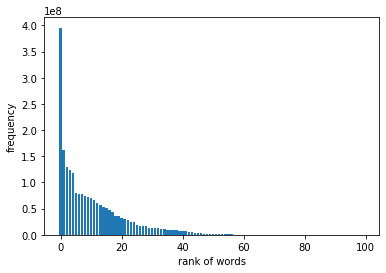

In [34]:
#charcater frequency zipfian graph
with open('Answer_3_output\\2cr\\uni_char.pickle', 'rb') as f:
    uni_char = pickle.load(f)
c_freq = list(uni_char.values())[:100]
c_freq.sort(reverse=True)
index = [i for i in range(len(c_freq))]
plt.bar(index, c_freq)
plt.xlabel('rank of words')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

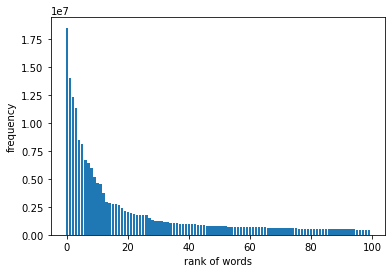

In [19]:
#word frequency zipfian graph
with open('Answer_3_output\\2cr\\uni_word.pickle', 'rb') as f:
    uni_word = pickle.load(f)
w_freq = list(uni_word.values())[:100]
w_freq.sort(reverse=True)
index = [i for i in range(len(w_freq))]
plt.bar(index, w_freq)
plt.xlabel('rank of words')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

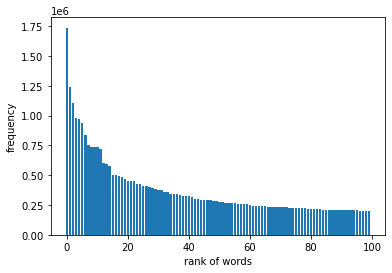

In [27]:
#syllables frequency zipfian graph
with open('Answer_3_output\\2cr\\tri_syl.pickle', 'rb') as f:
    uni_syl = pickle.load(f)
syl_freq = list(uni_syl.values())[:100]
syl_freq.sort(reverse=True)
index = [i for i in range(len(syl_freq))]
plt.bar(index, syl_freq)
plt.xlabel('rank of words')
plt.ylabel('frequency')

As we can see rank is inversely proportional to frequency of words. Hence, it follows the zipfian distribution.